Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn as sb

Import Dataset

In [ ]:
data=pd.read_csv("weather.csv")

Analyze the data

Handling Missing Data

In [ ]:
with pd.option_context('mode.use_inf_as_null', True):
   data = data.dropna()

In [ ]:
data.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6052,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6053,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6054,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75334,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
75335,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
75336,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
75337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)
data['Evaporation'].fillna(data['Evaporation'].mean(),inplace=True)
data['Sunshine'].fillna(data['Sunshine'].mean(),inplace=True)
data['Cloud9am'].fillna(data['Cloud9am'].mean(),inplace=True)
data['Cloud3pm'].fillna(data['Cloud3pm'].mean(),inplace=True)

In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


Feature Scaling

In [ ]:
data_c=data[["RainToday","WindGustDir","WindDir9am","WindDir3pm","RainTomorrow"]]

In [ ]:
data.drop(columns=["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1,inplace=True)
data.drop(columns=["RainToday","WindGustDir","WindDir9am","WindDir3pm","RainTomorrow"],axis=1,inplace=True)

In [ ]:
data.drop(columns=["Date"],axis=1,inplace=True)

In [ ]:
data.drop(columns=["Location"],axis=1,inplace=True)

In [ ]:
c_names=data_c.columns

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp_mode=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [ ]:
data_c=imp_mode.fit_transform(data_c)

In [ ]:
data_c=pd.DataFrame(data_c,columns=c_names)

In [ ]:
data_c["RainToday"]=data_c["RainToday"].astype('category')
data_c["WindGustDir"]=data_c["WindGustDir"].astype('category')
data_c["WindDir9am"]=data_c["WindDir9am"].astype('category')
data_c["WindDir3pm"]=data_c["WindDir3pm"].astype('category')
data_c["RainTomorrow"]=data_c["RainTomorrow"].astype('category')

In [ ]:
data_c["RainToday"]=data_c["RainToday"].cat.codes
data_c["WindGustDir"]=data_c["WindGustDir"].cat.codes
data_c["WindDir9am"]=data_c["WindDir9am"].cat.codes
data_c["WindDir3pm"]=data_c["WindDir3pm"].cat.codes
data_c["RainTomorrow"]=data_c["RainTomorrow"].cat.codes

In [ ]:
data_c.tail()

,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
24943,0,8,10,8,0
24944,0,9,11,0,0
24945,0,14,0,15,0
24946,0,15,13,15,1
24947,1,12,8,8,0


In [ ]:
data=pd.concat([data,data_c],axis=1)

In [ ]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.0,1.0,12.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.0,10.0,10.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,5.0,6.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,14.0,14.0,15.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,14.0,7.0,14.0,0.0


Independant and Dependant Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)

In [ ]:
names=x.columns
names

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'WindGustDir',
       'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [ ]:
LE = LabelEncoder()
x['RainToday'] = LE.fit_transform(x['RainToday'])




In [ ]:
LE = LabelEncoder()
x['WindGustDir'] = LE.fit_transform(x['WindGustDir'])

In [ ]:
LE = LabelEncoder()
x['WindDir3pm'] = LE.fit_transform(x['WindDir3pm'])

In [ ]:
LE = LabelEncoder()
y = LE.fit_transform(y)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
x = sc.fit_transform(x)

In [ ]:
x = pd.DataFrame(x,columns=names)
y  =pd.DataFrame(y)

In [ ]:
from sklearn import model_selection

In [ ]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size = 0.2,random_state = 0)

In [ ]:
x_train.fillna(x_train.mean(), inplace=True)
x_test.fillna(x_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(x_train.mean(), inplace=True)

In [ ]:
np.any(np.isnan(x_train))
np.all(np.isfinite(x_train))

True

SPRINT 2

Model Comparsion

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [ ]:
XGBoost = xgb.XGBRFClassifier()


In [ ]:
Rand_forest = sklearn.ensemble.RandomForestClassifier()

In [ ]:
svm = sklearn.svm.SVC()

In [ ]:
Dtree=sklearn.tree. DecisionTreeClassifier()

In [ ]:
GBM = sklearn.ensemble.GradientBoostingClassifier()

In [ ]:
log=sklearn.linear_model.LogisticRegression()

In [ ]:
np.all(np.isfinite(x_train))

True

In [ ]:
XGBoost.fit(x_train,y_train) 
Rand_forest.fit(x_train,y_train) 
svm.fit(x_train,y_train)
Dtree.fit(x_train,y_train) 
GBM.fit(x_train,y_train) 
log.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

LogisticRegression()

In [ ]:
p1 = XGBoost.predict(x_train) 
p2 = Rand_forest.predict(x_train)
p3 = svm.predict(x_train)
p4 = Dtree.predict(x_train)
p5 = GBM.predict(x_train)
p6 = log.predict(x_train)

In [ ]:
from sklearn import metrics
print("xgboost:",metrics.accuracy_score (y_train,p1)) 
print("Rand_forest: ", metrics.accuracy_score (y_train,p2)) 
print("svm:",metrics.accuracy_score (y_train, p3)) 
print("Dtree:", metrics.accuracy_score (y_train,p4)) 
print("GBM:",metrics.accuracy_score (y_train,p5)) 
print("log: ",metrics.accuracy_score (y_train, p6))

xgboost: 0.8756736612773764
Rand_forest:  0.9285919045980966
svm: 0.8779383098268547
Dtree: 0.9285919045980966
GBM: 0.881578947368421
log:  0.8768203187707831


Model Evaluation

In [ ]:
y_pred = Rand_forest.predict(x_test)
conf_matrix= metrics.confusion_matrix(y_test,y_pred)
conf_matrix

array([[3645,  235,    0],
       [ 939,  183,    0],
       [   0,    0, 3719]])

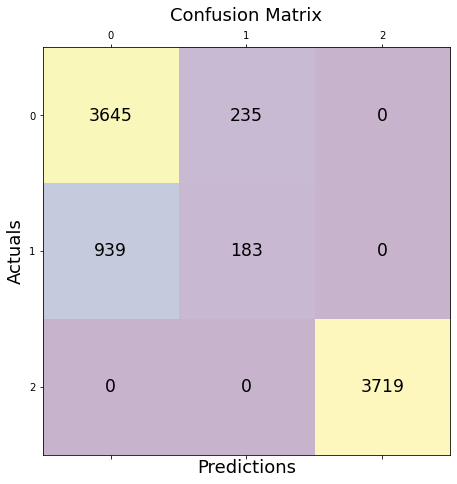

In [ ]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(conf_matrix,alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='xx-large')
plt.xlabel('Predictions', fontsize=18) 
plt.ylabel('Actuals', fontsize=18) 
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(conf_matrix)
Accuracy=metrics.accuracy_score (y_train,p2)
print("Accuracy:",Accuracy)
Precision=metrics.precision_score(y_test, y_pred,average='macro')
print("Precession:",Precision)
Recall=metrics.recall_score(y_test, y_pred,average='macro')
print("Recall:",Recall)
F1_score=metrics.f1_score(y_test, y_pred,average='macro')
print("F1-score:",F1_score)

[[3645  235    0]
 [ 939  183    0]
 [   0    0 3719]]
Accuracy: 0.9285919045980966
Precession: 0.7443187037083426
Recall: 0.7008448646562654
F1-score: 0.6996524112308612


In [128]:
import pickle
model = Rand_forest
pickle.dump(model,open('rainfall.pkl','wb')) 
le = LE
pickle.dump(le,open('encoder.pkl','wb')) 
pickle.dump(imp_mode,open('impter.pkl','wb'))
pickle.dump(sc,open('scale.pkl','wb'))